In [1]:
import os
import seaborn as sns
import copy

In [2]:
# Add current working directory to Python's sys path if not included
imp_mods = os.sys.path
my_pkg = os.getcwd()

if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print('Package imported.')

In [3]:
# import class CensusDataset from a customized module census_methods
from census_methods import CensusDataset as cd

In [4]:
# read-in data from csv file
census_df = sns.categorical.pd.read_csv('census_16_new - Copy.csv')

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7579 non-null   object
 1   Street                         7581 non-null   object
 2   First Name                     7579 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
dtypes: object(11)
memory usage: 651.6+ KB


In [6]:
census_df.describe(include='all').transpose()

,count,unique,top,freq
House Number,7579,152,1,345
Street,7581,105,Wharf Wells,314
First Name,7579,370,Colin,36
Surname,7581,626,Smith,204
Age,7581,121,19,138
Relationship to Head of House,7581,20,Head,2879
Marital Status,5904,6,Single,2595
Gender,7581,8,Female,3932
Occupation,7581,1099,Student,1382
Infirmity,7581,8,None,7540


In [7]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,Male,Student,None,NaN
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None


### Check for missing values

In [8]:
missing_vals = cd.null_checker(census_df)

In [9]:
perc_missing = (100 * missing_vals/census_df.shape[0]).sort_values(ascending=False)
perc_missing
non_missing_vals = 100 - perc_missing
non_missing_vals

Religion                          77.351273
Marital Status                    77.878908
House Number                      99.973618
First Name                        99.973618
Street                           100.000000
Surname                          100.000000
Age                              100.000000
Relationship to Head of House    100.000000
Gender                           100.000000
Occupation                       100.000000
Infirmity                        100.000000
dtype: float64

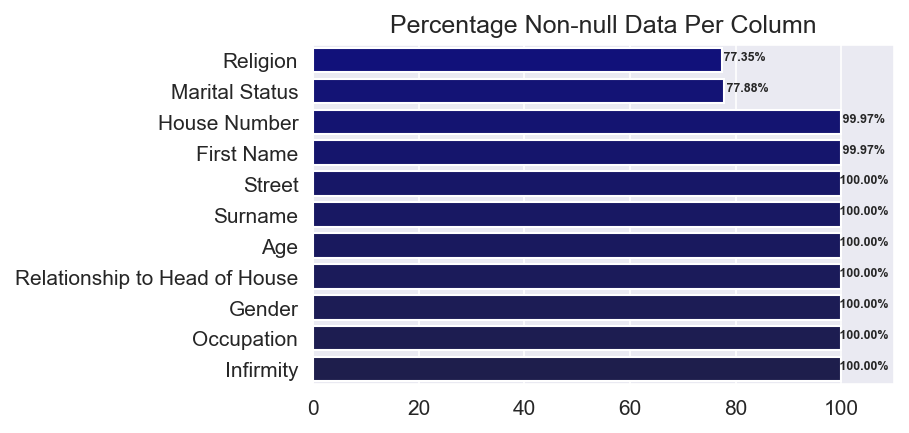

In [10]:
sns.set_style('darkgrid')

perc_missing_data_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

pal = sns.dark_palette('darkblue', 17, reverse=True)

plotted = sns.barplot(x=non_missing_vals, y=non_missing_vals.index, palette=pal)

plotted.set_title("Percentage Non-null Data Per Column")
plotted.set_xlim(0, 110, auto=True)

for i in range(len(non_missing_vals)):
    plotted.text(non_missing_vals[i]+4, i, f"{non_missing_vals[i]: 0.2f}%",
                fontsize=6, weight='bold', horizontalalignment='center')

# plotted.text(116, 0, "Missing (%)\n" +
#              "-"*20 + "\n" +
#             f"Marital Status: {perc_missing.loc['Marital Status']:0.2f}%\n" +
#              f"Religion: {perc_missing.loc['Religion']:0.2f}%\n",
#             fontsize=8, color='blue',
#              bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3});

In [11]:
fname = 'total_nulls_per_col.png'
cd.fig_writer(fname, perc_missing_data_fig)

'total_nulls_per_col.png'

### Check for blank(s)

In [12]:
blanks = cd.check_for_empty_str(census_df)
print("Blanks in:")
for col, is_blank in blanks.items():
    if is_blank:
        print(f"\t{col}")

Blanks in:
	Surname
	Marital Status
	Gender
	Infirmity
	Religion


In [13]:
col_blanks = cd.col_blank_rows(census_df)

In [14]:
for col, blanks in col_blanks.items():
    print(f"{col}: {len(blanks)} rows at {blanks}")

Surname: 1 rows at [5058]
Marital Status: 1 rows at [2397]
Gender: 2 rows at [503, 2418]
Infirmity: 5 rows at [340, 3345, 3419, 4562, 5644]
Religion: 3 rows at [2432, 7000, 7034]


In [15]:
col_blanks

{'Surname': [5058],
 'Marital Status': [2397],
 'Gender': [503, 2418],
 'Infirmity': [340, 3345, 3419, 4562, 5644],
 'Religion': [2432, 7000, 7034]}

In [16]:
blanks = sns.categorical.pd.Series({col: len(blanks) for col, blanks in col_blanks.items()}).sort_values(ascending=False)
blanks

Infirmity         5
Religion          3
Gender            2
Surname           1
Marital Status    1
dtype: int64

In [17]:
perc_blank = sns.categorical.np.round(100 * blanks/census_df.shape[0], 2)
perc_blank

Infirmity         0.07
Religion          0.04
Gender            0.03
Surname           0.01
Marital Status    0.01
dtype: float64

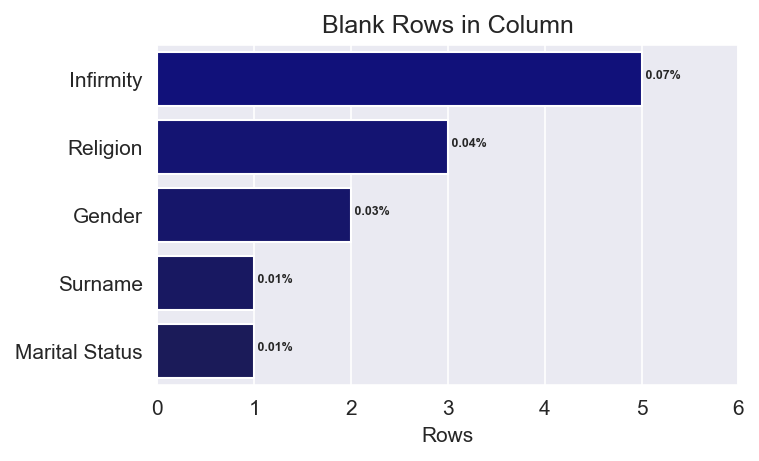

In [18]:
sns.set_style('darkgrid')

blank_data_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

pal = sns.dark_palette('darkblue', 10, reverse=True)

plotted = sns.barplot(x=blanks, y=blanks.index, palette=pal)

plotted.set_title("Blank Rows in Column")
plotted.set_xlim(0, 6)

for i in range(len(blanks)):
    plotted.text(blanks[i]+0.2, i, f"{perc_blank[i]: 0.2f}%",
                fontsize=6, weight='bold', horizontalalignment='center')

plotted.set_xlabel("Rows");

In [19]:
fname = 'total_blanks_per_column.png'
cd.fig_writer(fname, blank_data_fig)

'total_blanks_per_column.png'

### Unique Values

In [20]:
uniqs = cd.unique_categs(census_df)

In [21]:
num_uniq_per_col = sns.categorical.pd.Series({col: len(unq) for col, unq in uniqs.items()}).sort_values(ascending=False)
num_uniq_per_col

Occupation                       1099
Surname                           626
First Name                        371
House Number                      153
Age                               121
Street                            105
Relationship to Head of House      20
Religion                           15
Gender                              8
Infirmity                           8
Marital Status                      7
dtype: int64

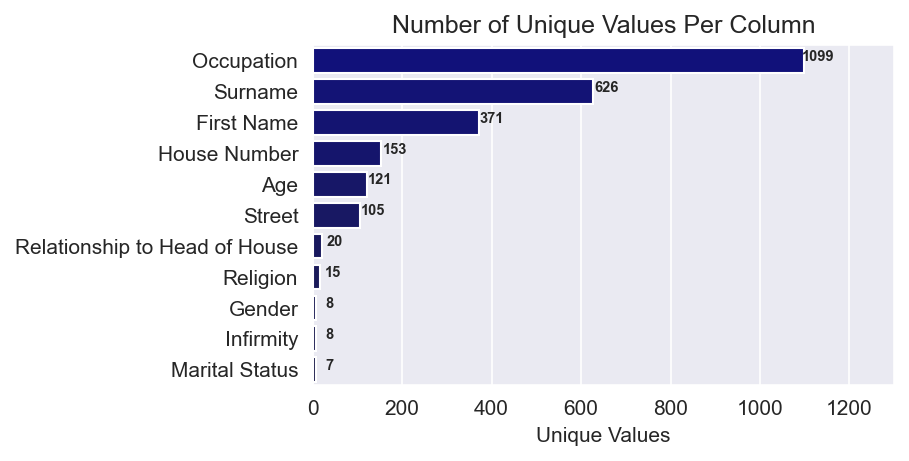

In [22]:
sns.set_style('darkgrid')
pal = sns.dark_palette('darkblue', 17, reverse=True)

unique_data_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

plotted = sns.barplot(x=num_uniq_per_col, y=num_uniq_per_col.index, palette=pal)

plotted.set_title("Number of Unique Values Per Column")
plotted.set_xlim(0, 1300, auto=True)

for i in range(len(num_uniq_per_col)):
    plotted.text(num_uniq_per_col[i]+30, i, f"{num_uniq_per_col[i]}",
                fontsize=7, weight='bold', horizontalalignment='center')

plotted.set_xlabel("Unique Values");

In [23]:
fname = 'unique_data_per_column.png'
cd.fig_writer(fname, unique_data_fig)

'unique_data_per_column.png'

### Data Consistency

In [24]:
print(uniqs['Occupation'])

['Prison officer', 'Futures trader', 'Student', 'Further education lecturer', 'Production assistant, television', 'Child', 'Retired Risk analyst', 'Retired Orthoptist', 'University Student', "Barrister's clerk", 'Nurse, adult', 'Retired Arts administrator', 'Retired Magazine features editor', 'Retired Customer service manager', 'Pharmacist, community', 'Scientist, water quality', 'Unemployed', 'Consulting civil engineer', 'Actuary', 'Housing manager/officer', 'Counsellor', 'Retired Air traffic controller', 'Television/film/video producer', 'Air traffic controller', 'Insurance account manager', 'Retired Ophthalmologist', 'Immunologist', 'Lecturer, higher education', 'Health promotion specialist', 'Retired Best boy', 'Retired Chemical engineer', 'Copywriter, advertising', 'Charity officer', 'Early years teacher', 'Exhibition designer', 'Sound technician, broadcasting/film/video', 'Energy manager', 'Pilot, airline', 'Merchant navy officer', 'Restaurant manager', 'Designer, multimedia', 'R

In [25]:
print(uniqs['Surname'])

['Bradley', 'Slater', "O'Brien", 'Palmer', 'Sutton', 'Marshall', 'Jones', 'Hanson', 'Smith', 'Nelson', 'Burns', 'Price', 'Doherty', 'Hargreaves', 'James', 'Webb', 'Johnson', 'Davies', 'Sharp', 'Green', 'Barnes', 'Martin', 'Patel', 'Brown', 'Gilbert', 'Lyons', 'Graham', 'Miles', 'Clarke', 'Field', 'Barker', 'Singh', 'Cameron', 'Murphy', 'Davis', 'Russell', 'Richardson', 'Potter', 'Edwards', 'Heath', 'Wong', 'Wood', 'Ferguson', 'Hughes', 'Tucker', 'Todd', 'Fisher', 'Dawson', 'Owens', 'Grant', 'Jade Alexander', 'Marsh', 'Adams', 'Blackburn', 'Knight', 'Young', 'Thomas', 'Carter', 'Freeman', 'Joyce', 'Hudson', 'Hyde', 'Rogers', 'Kirk', 'Pearson', 'Day', 'Wall', 'Burton', 'Shepherd', 'Dennis', 'Williamson-Hill', 'Payne-Williamson-Hill', 'Middleton', 'Hodgson', 'Rowe', 'Harris', 'Booth', 'Butler', 'Scott', 'Morrison', 'Nash', 'West', 'Simpson', 'Harrison-Simpson', 'Anderson', 'Morgan', 'Jackson', 'Lane', 'Morris', 'Duffy', 'Barber', 'Carr', 'Whittaker', 'Clark', 'Parker', 'Humphreys', 'Watki

In [26]:
print(uniqs['First Name'])

['Andrea', 'Peter', 'Lauren', 'Henry', 'Edward', 'Melanie', 'Lucy', 'Tina', 'Jeremy', 'Suzanne', 'Pamela', 'Justin', 'Benjamin', 'Julian', 'Beverley', 'Bethan', 'Marcus', 'Cheryl', 'Bernard', 'Scott', 'Bruce', 'Danielle', 'Bryan', 'Glenn', 'Melissa', 'Charlie', 'Graeme', 'Bethany', 'Frank', 'Denise', 'Jason', 'Kate', 'Simon', 'Jay', 'Daniel', 'Rosie', 'Marc', 'Christine', 'Helen', 'Lynne', 'Russell', 'Harriet', 'Jeffrey', 'Brian', 'Sylvia', 'Gareth', 'Ruth', 'Katy', 'Liam', 'Alexandra', 'Laura', 'Mohamed', 'Irene', 'Abigail', 'Adrian', 'Anna', 'Samantha', 'Dennis', 'Oliver', 'Robin', 'Sarah', 'Geraldine', 'Dawn', 'Annette', 'Alison', 'Kirsty', 'Tom', 'Jenna', 'Martin', 'Jennifer', 'Jake', 'Derek', 'Joshua', 'Kayleigh', 'Terence', 'Jade', nan, 'Vincent', 'Nathan', 'Vanessa', 'Eric', 'Clive', 'Janet', 'Paula', 'Patricia', 'Philip', 'Diane', 'Beth', 'Georgia', 'Maria', 'Hazel', 'Natalie', 'Duncan', 'Shirley', 'Clifford', 'Darren', 'Jayne', 'Joanne', 'Heather', 'Carly', 'Raymond', 'Trevor'

In [27]:
print(uniqs['House Number'])

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', 'Two', 'One', nan]


In [28]:
print(uniqs['Age'])

['43', '44', '5', '25', '24', '3', '105', '73', '19', '10', '57', '30', '2', '88', '85', '52', '56', '28', '47', '20', '75', '59', '42', '61', '67', '66', '76', '77', '50', '26', '27', '55', '53', '29', '11', '22', '64', '68', '38', '34', '32', '37', '13', '69', '81', '60', '72', '31', '54', '83', '41', '39', '33', '4', '48', '62', '70', '46', '16', '84', '65', '15', '21', '40', '14', '12', '23', '74', '7', '51', '92', '6', '45', '63', '18', '36', '55.55', '17', '9', '71', 'Four', '49', '0', '80', '89', '91', '35', '1.75', 'One', '58', '8', '1', '82', '79', '98', '100', '78', '94', '104', '96', '86', '87', '58.5088688', '0.5', '103', '93', '119', '90', '106', '55.52492408', '56.52492408', '131', '107', '55.27579403', '57.27579403', '99', '97', '-1', '95', '55.63583519', '59.22686093']


In [29]:
print(uniqs['Street'])

['Simmons Meadow', 'Morgan Avenue', 'Pillar Road', 'Wharf Place', 'Blue Spring', 'Stirling View', 'Smith Street', 'Griffiths Inlet', 'Shrine Harbor', 'Rees Locks', 'Dixon Drive', 'Howell Drive', 'Wharf Wells', 'Queen Avenue', 'Tegid Street', 'Chandler Drive', 'Adams Ways', 'Guardian Road', 'Runnymede Harbors', 'Coconutbelt Lane', 'North Road', 'Hall Lane', 'George Pass', 'Elizabeth Lane', 'Belle Center', 'Bell Orchard', 'Brooks Road', 'Windsor Avenue', 'Paladin Summit', 'Wright Brook', 'Green Wall', 'Doherty Extensions', 'Shillingcut Lane', 'February Street', 'Regent Lane', 'Mason Prairie', 'Scotland Avenue', 'Butterfly Avenue', 'Mary Drive', 'Mercia Underpass', 'Halfcrown Terrace', 'Oyster Road', 'Campbell Station', 'Parry Manor', 'Price Lane', 'Taylor Gateway', 'Brightwater Drive', 'Peacock Neck', 'Clayton Brooks', 'Portsmouth Park', 'Smith Manors', 'Spencer Avenue', 'Clementine Points', 'Guild Lane', 'Cancerpath Drive', 'Albion Springs', 'Duchess Street', 'Dockers Fords', 'Edwards F

In [30]:
print(uniqs['Relationship to Head of House'])

['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Granddaughter', 'Grandson', 'Wife', 'None', 'Partner', 'Neice', 'Sibling', 'Visitor', 'Adopted Daughter', 'Step-Son', 'Cousin', 'Adopted Son', 'Step-Daughter', 'Son-in-law', 'Nephew']


In [31]:
print(uniqs['Religion'])

['None', nan, 'Christian', 'Catholic', 'Muslim', 'Methodist', 'Jewish', 'Jedi', 'Sikh', 'Bahai', 'Agnostic', 'Undecided', ' ', 'Baptist', 'Private']


In [32]:
print(uniqs['Gender'])

['Female', 'Male', 'F', 'M', 'Fe-male', 'MALE', ' ', 'FEMALE']


In [33]:
print(uniqs['Infirmity'])

['None', 'Mental Disability', 'Physical Disability', 'Deaf', ' ', 'Disabled', 'Unknown Infection', 'Blind']


In [34]:
print(uniqs['Marital Status'])

['Married', nan, 'Divorced', 'Widowed', 'Single', 'Di-vorced', ' ']


___

**<center> THE END</center>**

___